In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import wot

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load data for computing transport maps

We now read in the expression matrix, cell days, batch information, and use the learned cell growth rates we previously computed. 
We apply a filter to compute transport maps for the serum time course. (Recall that the dataset includes two time-courses: 2i and serum). 

In [2]:
VAR_GENE_DS_PATH = 'data/ExprMatrix.var.genes.h5ad'
LEARNED_GROWTH_SCORES_PATH = 'tmaps/serum_g.txt'
BATCH_PATH = 'data/batches.txt'
CELL_DAYS_PATH = 'data/cell_days.txt'
SERUM_CELL_IDS_PATH = 'data/serum_cell_ids.txt'

adata = wot.io.read_dataset(VAR_GENE_DS_PATH, obs=[CELL_DAYS_PATH, BATCH_PATH, LEARNED_GROWTH_SCORES_PATH], obs_filter=SERUM_CELL_IDS_PATH)

# Compute transport maps and validate

Initialize OT model. Since we already learned growth rates in the previous notebook, we only do one growth iteration (the default).

In [3]:
ot_model = wot.ot.OTModel(adata, growth_rate_field='g2') 

Compute a single transport map from day 17 to 18 and interpolate at 17.5

In [7]:
summary17_5 = wot.ot.compute_validation_summary(ot_model, day_triplets=[(17, 17.5, 18)])

In [8]:
summary17_5

,cv0,cv1,distance,full,interval_end,interval_mid,interval_start,name,t0,t1
0,2,1,14.143939,False,18,17.5,17,P,17.5,17.5
1,"(1, 1)",1,17.010200,False,18,17.5,17,Rg,17.5,17.5
2,"(1, 1)",1,11.643674,False,18,17.5,17,I,17.5,17.5
3,"(1, 1)",1,16.979299,False,18,17.5,17,R,17.5,17.5
4,1,1,13.375477,False,18,17.5,17,F,17.0,17.5
5,1,1,13.187984,False,18,17.5,17,L,18.0,17.5
6,"(1, 2)",1,17.001261,False,18,17.5,17,Rg,17.5,17.5
7,"(1, 2)",1,12.084057,False,18,17.5,17,I,17.5,17.5
8,"(1, 2)",1,16.950065,False,18,17.5,17,R,17.5,17.5
9,"(2, 1)",1,17.096418,False,18,17.5,17,Rg,17.5,17.5


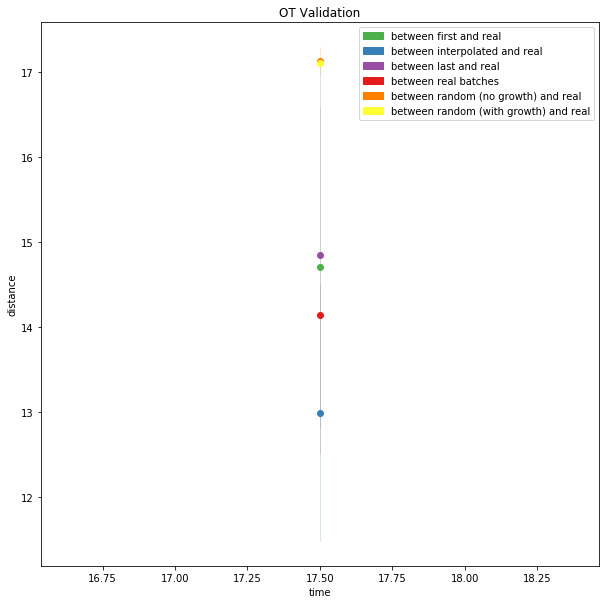

In [9]:
wot.graphics.plot_ot_validation_summary_stats(summary17_5.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

Compare to no growth

In [10]:
ot_model_no_g = wot.ot.OTModel(adata, growth_rate_field=None) 
summary17_5_no_g = wot.ot.compute_validation_summary(ot_model_no_g, day_triplets=[(8, 8.5, 9)])

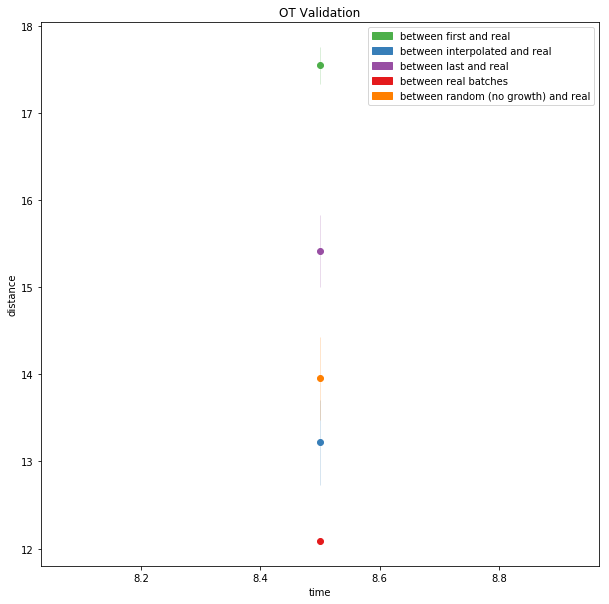

In [ ]:
wot.graphics.plot_ot_validation_summary_stats(summary17_5_no_g.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

Compute all transport maps

In [ ]:
all_triplets_summary = wot.ot.compute_validation_summary(ot_model)

# save results
all_triplets_summary.to_csv('serum_validation_summary.txt')
all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats.to_csv('serum_validation_summary_stats.txt')

Save results to file and plot

In [ ]:
# load results

# plot results
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)